LAST UPDATE: 16/07/2021

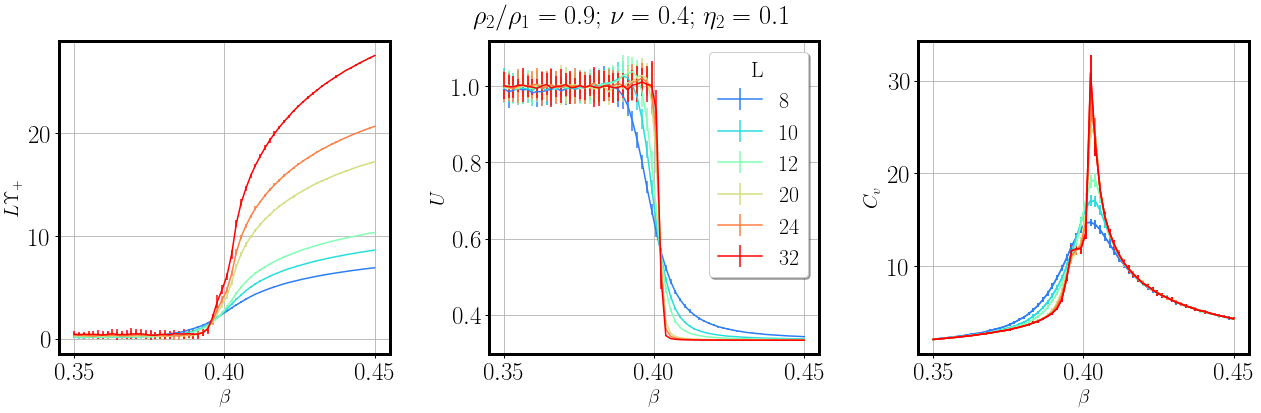

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.4
h=1
rho=1
alpha=0.9
eta1=0
eta2=0.1
blow=0.35
bhigh=0.45

blow_2=0.35
bhigh_2=0.45

Hinit=1
nMAX=30

LLIST=[8, 10, 12, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))
fig.suptitle(r"$\rho_2/\rho_1=%s$; $\nu=%s$; $\eta_2=%s$" %(alpha, nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ L \Upsilon_{+} $")
ax1[1].set_ylabel(r"$U$")
ax1[2].set_ylabel(r"$C_v $")
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_2, bhigh_2, nMAX, Hinit))
          
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]


    beta_2, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_mix, err_J_mix=np.loadtxt("%s/Helicity_modulus_mixedcomponents.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J1, err_J1, J2, err_J2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR,  usecols=(0,1,2, 3, 4), unpack=True )
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    

    data_Cv_2=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta_2= data_Cv_2[0]
    Cv_2= data_Cv_2[1]
    err_Cv_2= data_Cv_2[2] 
    
    
    #ax1[0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    #ax1[0].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m)
    # ax1[0].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt="-", c=c_m)
    ax1[0].errorbar(beta_2, L*J_sum, yerr=L*err_J_sum, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_2, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)

ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )



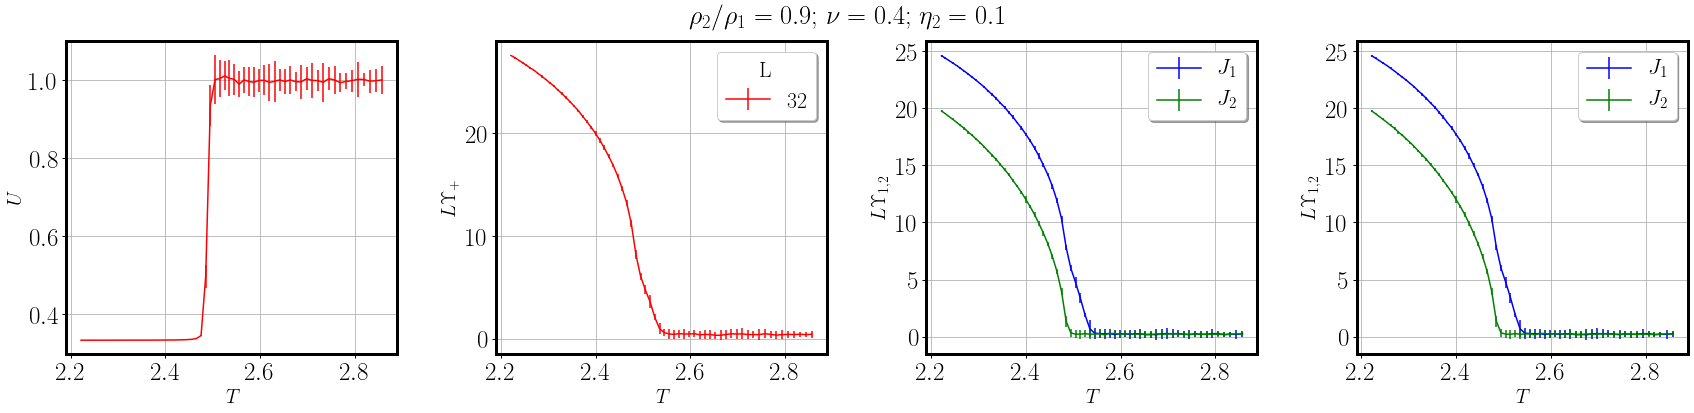

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.4
h=1
rho=1
alpha=0.9
eta1=0
eta2=0.1
blow=0.35
bhigh=0.45

blow_2=0.35
bhigh_2=0.45

Hinit=1
nMAX=30

LLIST=[32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(24,6))
fig.suptitle(r"$\rho_2/\rho_1=%s$; $\nu=%s$; $\eta_2=%s$" %(alpha, nu, eta2))
ax1[0].set_xlabel(r"$T$")
ax1[1].set_xlabel(r"$T$")
ax1[2].set_xlabel(r"$T$")
ax1[3].set_xlabel(r"$T$")
#ax1[0].set_ylabel(r"$\langle L \Upsilon_{-} \rangle$")
ax1[0].set_ylabel(r"$U$")
ax1[1].set_ylabel(r"$L \Upsilon_{+}$")
ax1[2].set_ylabel(r"$L \Upsilon_{1,2}$")
ax1[3].set_ylabel(r"$L \Upsilon_{1,2}$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()
ax1[3].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_2, bhigh_2, nMAX, Hinit))
          
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]


    beta_2, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_mix, err_J_mix=np.loadtxt("%s/Helicity_modulus_mixedcomponents.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J1, err_J1, J2, err_J2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR,  usecols=(0,1,2, 3, 4), unpack=True )
    beta_2, J1_2, err_J1_2, J2_2, err_J2_2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR_2,  usecols=(0,1,2, 3, 4), unpack=True )

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    


    data_Cv_2=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta_2= data_Cv_2[0]
    Cv_2= data_Cv_2[1]
    err_Cv_2= data_Cv_2[2] 
    
    #ax1[0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    #ax1[0].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m)
    ax1[0].errorbar(1./beta, U, yerr=err_U, fmt="-", c=c_m)
    ax1[1].errorbar(1./beta_2, L*J_sum, yerr=L*err_J_sum, fmt="-", c=c_m, label="%s" %L)
    ax1[2].errorbar(1./beta, L*J1,yerr=L*err_J1, fmt= "-",c='blue', label="$J_1$")
    ax1[2].errorbar(1/beta,L*J2,yerr=L*err_J2, fmt= "-", c='green', label="$J_2$")
    ax1[3].errorbar(1/beta_2, L*J1_2,yerr=L*err_J1_2, fmt= "-", c='blue', label="$J_1$")
    ax1[3].errorbar(1/beta_2,L*J2_2,yerr=L*err_J2_2, fmt= "-", c='green', label="$J_2$")
ax1[1].legend(loc="best", title="L")
ax1[2].legend(loc="best")
ax1[3].legend(loc="best")

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )


# fig.tight_layout()
# fig.subplots_adjust(wspace=0.3, top=0.9)
# fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )



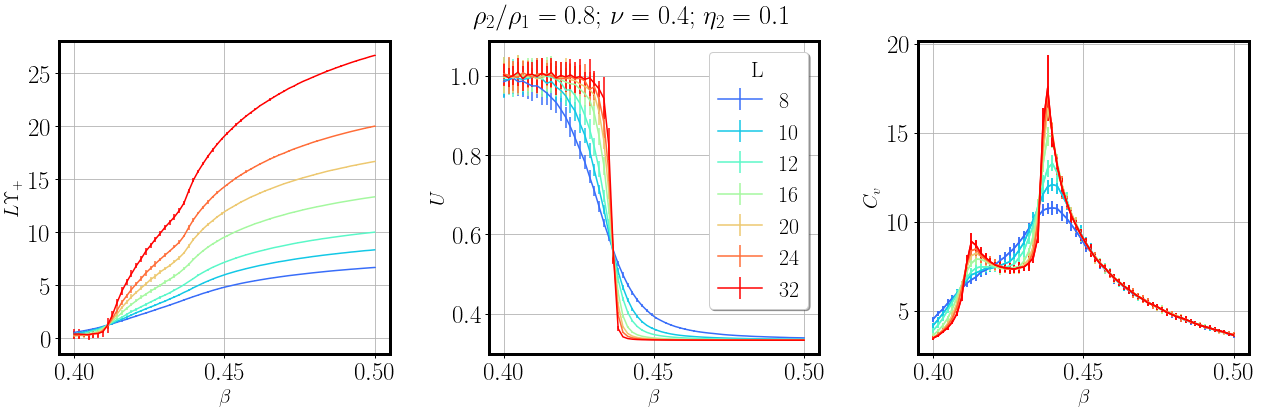

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.4
h=1
rho=1
alpha=0.8
eta1=0
eta2=0.1
blow=0.4
bhigh=0.5


Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))
fig.suptitle(r"$\rho_2/\rho_1=%s$; $\nu=%s$; $\eta_2=%s$" %(alpha, nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ L \Upsilon_{+} $")
ax1[1].set_ylabel(r"$U$")
ax1[2].set_ylabel(r"$C_v $")
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
          
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]


    beta_2, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_mix, err_J_mix=np.loadtxt("%s/Helicity_modulus_mixedcomponents.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J1, err_J1, J2, err_J2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR,  usecols=(0,1,2, 3, 4), unpack=True )
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    

    data_Cv_2=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta_2= data_Cv_2[0]
    Cv_2= data_Cv_2[1]
    err_Cv_2= data_Cv_2[2] 
    
    
    # ax1[0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    # ax1[1].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m)
    ax1[1].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)

    # ax1[1].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt="-", c=c_m)
    ax1[0].errorbar(beta_2, L*J_sum, yerr=L*err_J_sum, fmt="-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_2, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)

ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )



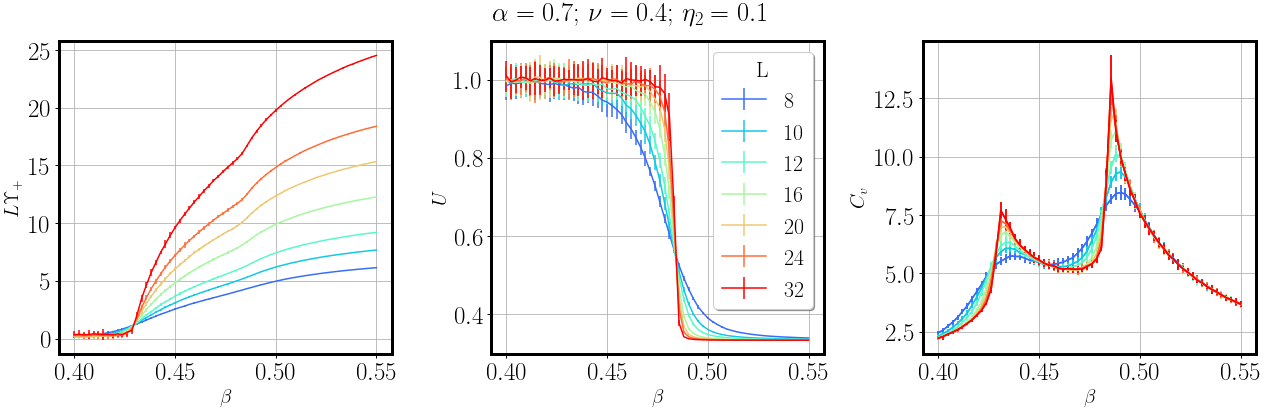

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.4
h=1
rho=1
alpha=0.7
eta1=0
eta2=0.1
blow=0.4
bhigh=0.55


Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18,6))
fig.suptitle(r"$\alpha=%s$; $\nu=%s$; $\eta_2=%s$" %(alpha, nu, eta2))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ L \Upsilon_{+} $")
ax1[1].set_ylabel(r"$U$")
ax1[2].set_ylabel(r"$C_v $")
ax1[0].grid()
ax1[1].grid()
ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
          
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]


    beta_2, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_mix, err_J_mix=np.loadtxt("%s/Helicity_modulus_mixedcomponents.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J1, err_J1, J2, err_J2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR,  usecols=(0,1,2, 3, 4), unpack=True )
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    

    data_Cv_2=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta_2= data_Cv_2[0]
    Cv_2= data_Cv_2[1]
    err_Cv_2= data_Cv_2[2] 
    
    
    # ax1[0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    # ax1[1].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m)
    ax1[1].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)

    # ax1[1].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt="-", c=c_m)
    ax1[0].errorbar(beta_2, L*J_sum, yerr=L*err_J_sum, fmt="-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta_2, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)

ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )



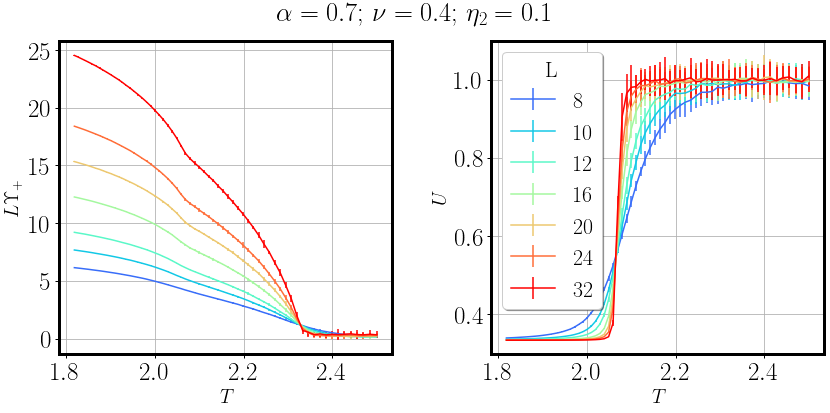

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.4
h=1
rho=1
alpha=0.7
eta1=0
eta2=0.1
blow=0.4
bhigh=0.55


Hinit=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12,6))
fig.suptitle(r"$\alpha=%s$; $\nu=%s$; $\eta_2=%s$" %(alpha, nu, eta2))
ax1[0].set_xlabel(r"$T$")
ax1[1].set_xlabel(r"$T$")
# ax1[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ L \Upsilon_{+} $")
ax1[1].set_ylabel(r"$U$")
# ax1[2].set_ylabel(r"$C_v $")
ax1[0].grid()
ax1[1].grid()
# ax1[2].grid()

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
          
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]


    beta_2, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_mix, err_J_mix=np.loadtxt("%s/Helicity_modulus_mixedcomponents.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J1, err_J1, J2, err_J2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR,  usecols=(0,1,2, 3, 4), unpack=True )
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    

    data_Cv_2=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta_2= data_Cv_2[0]
    Cv_2= data_Cv_2[1]
    err_Cv_2= data_Cv_2[2] 
    
    
    # ax1[0].errorbar(beta, L*J1, yerr=L*err_J1, fmt="-", c=c_m, label="%s" %L)
    # ax1[1].errorbar(beta, L*J2, yerr=L*err_J2, fmt="-", c=c_m)
    ax1[1].errorbar(1./beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)

    # ax1[1].errorbar(beta, L*J_diff, yerr=L*err_J_diff, fmt="-", c=c_m)
    ax1[0].errorbar(1./beta_2, L*J_sum, yerr=L*err_J_sum, fmt="-", c=c_m, label="%s" %L)
    # ax1[2].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    # ax1[2].errorbar(beta_2, Cv_2,yerr=err_Cv_2, fmt= "-", c=c_m, label="%s" %L)

ax1[1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )



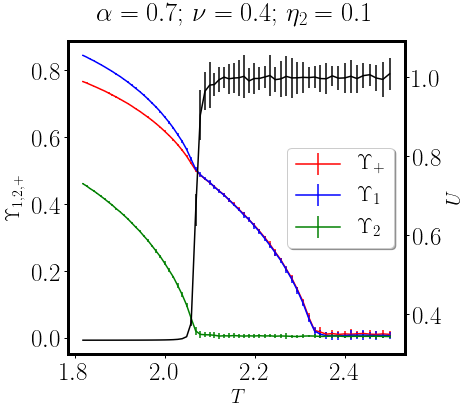

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

e=0
nu=0.4
h=1
rho=1
alpha=0.7
eta1=0
eta2=0.1
blow=0.4
bhigh=0.55

blow_2=0.4
bhigh_2=0.55

Hinit=1
nMAX=30

LLIST=[32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(7,6))
fig.suptitle(r"$\alpha=%s$; $\nu=%s$; $\eta_2=%s$" %(alpha, nu, eta2))
ax1.set_xlabel(r"$T$")

ax1.set_ylabel(r"$\Upsilon_{1,2, +}$")

ax2=ax1.twinx()
ax2.set_ylabel(r"$U$")


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
       
    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_2, bhigh_2, nMAX, Hinit))
          
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]


    beta_2, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_mix, err_J_mix=np.loadtxt("%s/Helicity_modulus_mixedcomponents.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J1, err_J1, J2, err_J2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR,  usecols=(0,1,2, 3, 4), unpack=True )
    beta_2, J1_2, err_J1_2, J2_2, err_J2_2=np.loadtxt("%s/Helicity_modulus_singlecomponents.txt" %HOMEDIR_2,  usecols=(0,1,2, 3, 4), unpack=True )

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    


    data_Cv_2=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta_2= data_Cv_2[0]
    Cv_2= data_Cv_2[1]
    err_Cv_2= data_Cv_2[2] 

    ax2.errorbar(1./beta, U, yerr=err_U, fmt="-", c='black')
    ax1.errorbar(1./beta_2, J_sum, yerr=err_J_sum, fmt="-", c=c_m, label=r"$\Upsilon_{+}$")
    ax1.errorbar(1./beta, J1,yerr=err_J1, fmt= "-",c='blue', label=r"$\Upsilon_{1}$")
    ax1.errorbar(1./beta,J2,yerr=err_J2, fmt= "-", c='green', label=r"$\Upsilon_{2}$")


ax1.legend(loc="center right")

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/Stiffnesses_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )


# fig.tight_layout()
# fig.subplots_adjust(wspace=0.3, top=0.9)
# fig.savefig("%s/New_alpha%s_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, alpha, e, nu, eta1, eta2) )

